# **Project Description**

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings: 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

## What is AirBnb?

Airbnb is an online marketplace that connects people who want to rent out their homes with people who are looking for accommodations in specific locales and hospitality service for people to lease or rent short-term lodging including holiday cottages, apartments, homestays, hostel beds, or hotel rooms. Basically they provide the platform that is shared by hosts and visitors worldwide.

# **Dataset Description**

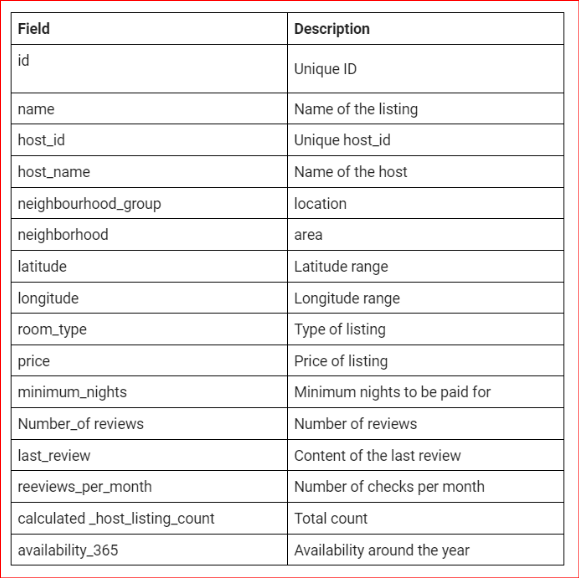

# **AirBnb Bookings Analysis**

In [55]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [56]:
# Code for mounting your Google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
#Loading Dataset
drive_path = '/content/drive/MyDrive/Data Science  Projects /Exploratory Data Analysis /AirBnb Bookings Analysis/Airbnb NYC 2019.csv'

df = pd.read_csv(drive_path)

In [58]:
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [59]:
df.shape

(48895, 16)

**Observation:**
The total number of rows and columns are 48895 and 16 respectively.

In [60]:
# Obtaining important info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

**Observation:**
Some columns have null values and missing data,we will need to clean those.

In [61]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

**Observations:**

1)Columns like name,host_name,last_review,reviews_per_month have missing values.
name and host_name column is not important as it does not convey any meaningful data.
So those columns can be dropped.

2)last_review and reviews_per_month have the same number of NaN values which means certain properties were not rated at all hence last_review has no date and reviews_per_month has no data.

So these nan values can be replaced with zero.

In [62]:
# Drop the columns like name,host_name and last review
df.drop(['host_name','name','last_review'],inplace=True,axis=1)

# Replacing the NaN with zero
df.fillna({'reviews_per_month':0},inplace=True)

In [63]:
#checking changes
df.isnull().sum()

id                                0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

**Observation:**
All Null Values are Eliminated.

In [64]:
# Checking duplicate rows

df.duplicated().sum()

0

**Observation:**

No duplicate rows are found.

In [65]:
# we are excluding latitude longitude as they are coordinate.
#we are also excluding id & host_id as they're unique id.

col_after_excluding = set(df.columns) - {'latitude', 'longitude', 'id', 'host_id'}
df[col_after_excluding].describe()

,calculated_host_listings_count,reviews_per_month,availability_365,number_of_reviews,minimum_nights,price
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,7.143982,1.090910,112.781327,23.274466,7.029962,152.720687
std,32.952519,1.597283,131.622289,44.550582,20.510550,240.154170
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,0.040000,0.000000,1.000000,1.000000,69.000000
50%,1.000000,0.370000,45.000000,5.000000,3.000000,106.000000
75%,2.000000,1.580000,227.000000,24.000000,5.000000,175.000000
max,327.000000,58.500000,365.000000,629.000000,1250.000000,10000.000000


In [66]:
dist_col_list = df[col_after_excluding].describe().columns.tolist()

In [67]:
df['price'].unique()

array([  149,   225,   150,    89,    80,   200,    60,    79,   135,
          85,   120,   140,   215,    99,   190,   299,   130,   110,
          44,   180,    50,    52,    55,    70,    35,    40,    68,
         115,   151,   228,   144,    69,    49,   375,   250,   275,
         230,    51,    65,   105,    95,   145,   285,    94,   800,
         131,    98,   100,   125,   175,   500,   101,   220,    59,
         350,   199,   325,   235,   170,   400,    75,    90,   185,
          77,    76,   160,   195,   156,   219,   475,   165,   196,
          83,   123,   265,   249,   121,    45,    71,    64,   159,
         189,   239,   305,   155,    92,    36,    37,   205,    39,
         390,   129,   212,   124,   122,   109,   575,   229,   169,
         113,   179,   349,   139,   650,    67,   599,   211,   290,
          87,   395,   260,    97,   132,   141,   495,   259,    96,
         295,   451,   300,    42,   255,    72,    88,   450,   198,
          46,    33,

In [68]:
df['minimum_nights'].unique()

array([   1,    3,   10,   45,    2,    5,    4,   90,    7,   14,   60,
         29,   30,  180,    9,   31,    6,   15,    8,   26,   28,  200,
         50,   17,   21,   11,   25,   13,   35,   27,   18,   20,   40,
         44,   65,   55,  120,  365,  122,   19,  240,   88,  115,  150,
        370,   16,   80,  181,  265,  300,   59,  185,  360,   56,   12,
         70,   39,   24,   32, 1000,  110,  270,   22,   75,  250,   62,
         23, 1250,  364,   74,  198,  100,  500,   43,   91,  480,   53,
         99,  160,   47,  999,  186,  366,   68,   93,   87,  183,  299,
        175,   98,  133,  354,   42,   33,   37,  225,  400,  105,  184,
        153,  134,  222,   58,  210,  275,  182,  114,   85,   36])

**Outliers**

* There are some listings with price = 0.

* There are few listings that have minimum nights to stay > 365

In [69]:
#Rows which have 'price'=0

df[df['price']==0]

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
23161,18750597,8993084,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,0.05,4,28
25433,20333471,131697576,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2.56,4,127
25634,20523843,15787004,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,0.71,5,0
25753,20608117,1641537,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,0.53,2,0
25778,20624541,10132166,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,0.15,1,73
25794,20639628,86327101,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,4.28,6,176
25795,20639792,86327101,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,4.37,6,232
25796,20639914,86327101,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,4.35,6,222
26259,20933849,13709292,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0,3,0,0.00,1,0
26841,21291569,101970559,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,0.11,6,333


In [70]:
# A function for price_correction 

# changing price value from "0" to "100"

def price_correction(x):
    if x==0:
        return 100
    else:
        return x

In [71]:
# Using the price_correction function to change the 'price'

df['price']=df['price'].apply(price_correction)

In [72]:
#Changing values of 'minimum_nights' to 365 which are greater than 365

df['minimum_nights']=df['minimum_nights'].apply(lambda x: 365 if x>365 else x)

# Data is Cleaned and all values which do not make sense  are removed

# Exploratory Data Analysis

In [73]:
df.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


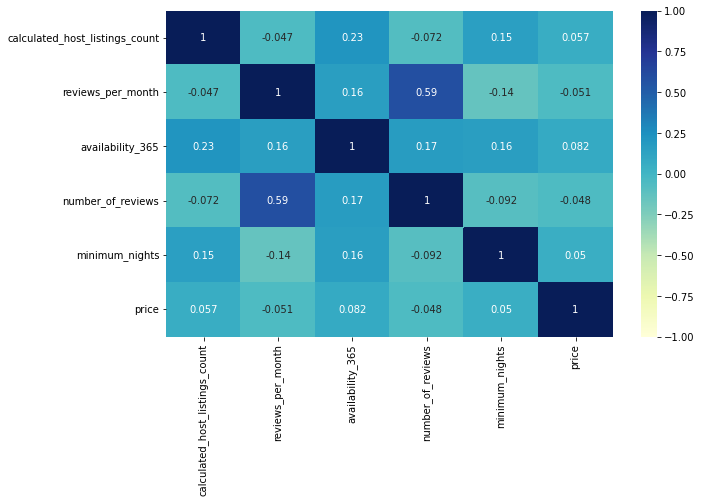

In [74]:
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(df[dist_col_list].corr(), linewidths=0, vmin=-1, annot=True, cmap="YlGnBu")
plt.show()

**Observation:**

no_of_reviews and reviews_per_month has high co-relation for obvious reason. But the price column also has very low corelation with other features.


In [75]:
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

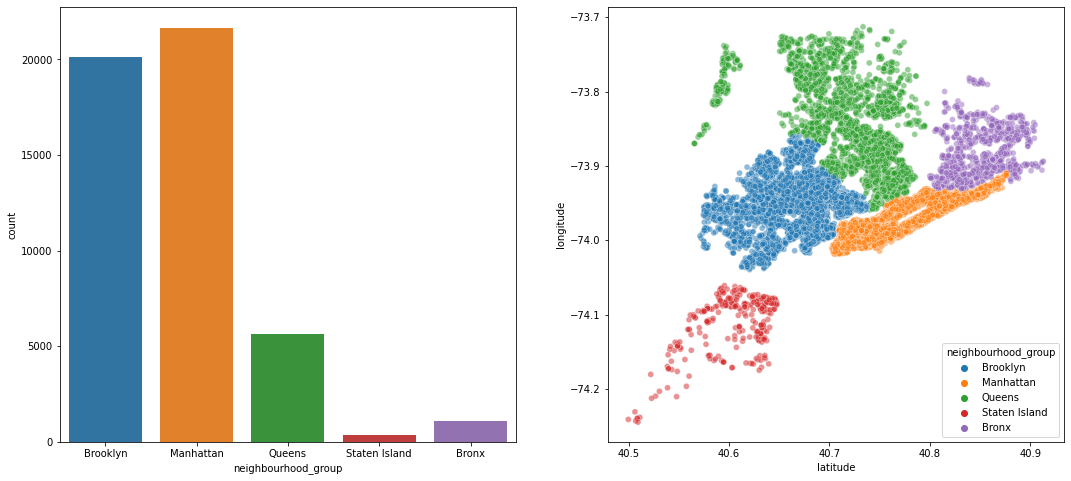

In [76]:

fig,axes = plt.subplots(1,2, figsize = (18,8))
sns.countplot(ax = axes[0],x = 'neighbourhood_group', data = df)
sns.scatterplot(ax = axes[1],data = df, x = 'latitude',y = 'longitude', hue = 'neighbourhood_group',alpha = 0.5)
plt.show()

**Observations:**
* Most number of listings are in Manhattan and Brooklyn.
* Least number of listings are in Staten Island and Bronx.

* Also, room density is uniform in Brooklyn and Manhattan.

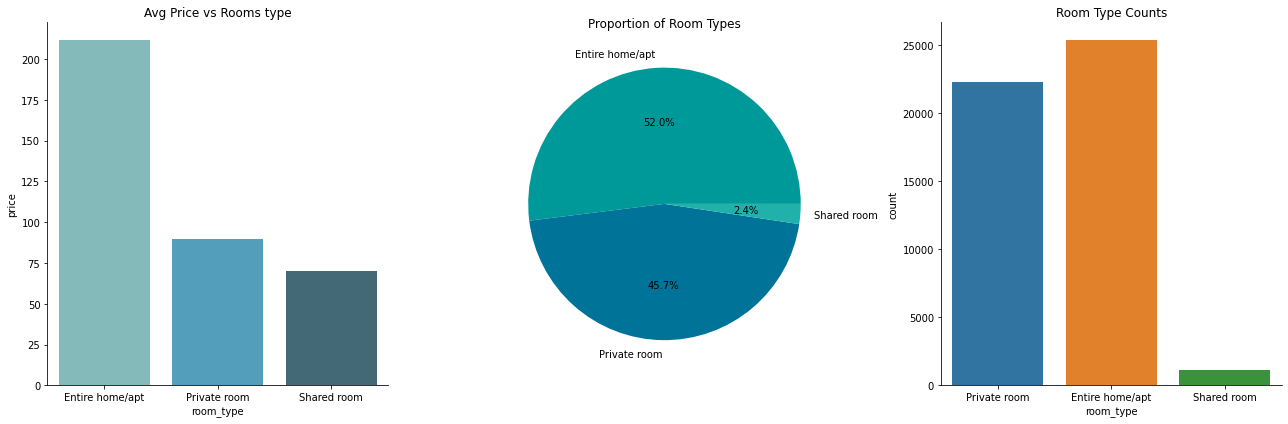

In [77]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
ax = axes.flatten()

mean_price_df = df.groupby('room_type', as_index=False)[['price']].mean()
sns.barplot(data=mean_price_df, x='room_type', y='price', palette='GnBu_d', ax=ax[0])
ax[0].set_title("Avg Price vs Rooms type");

labels = df['room_type'].value_counts().index
sizes = df['room_type'].value_counts().values
ax[1].pie(sizes, labels=labels, autopct='%1.1f%%', colors = ['#009999','#007399','#20B2AA'])
ax[1].set_title('Proportion of Room Types')

sns.countplot(data=df, x='room_type', ax=ax[2])
ax[2].set_title('Room Type Counts')

sns.despine(fig)
plt.tight_layout(h_pad=0.5, w_pad=0.8)

**Observations:**

**Entire home/apt** has more than 50% proportion in new york city and it too has highest avg price also. 

**Shared room** are the cheapest, but only has 2.4% proportion. No wonder New York life is of high standard.

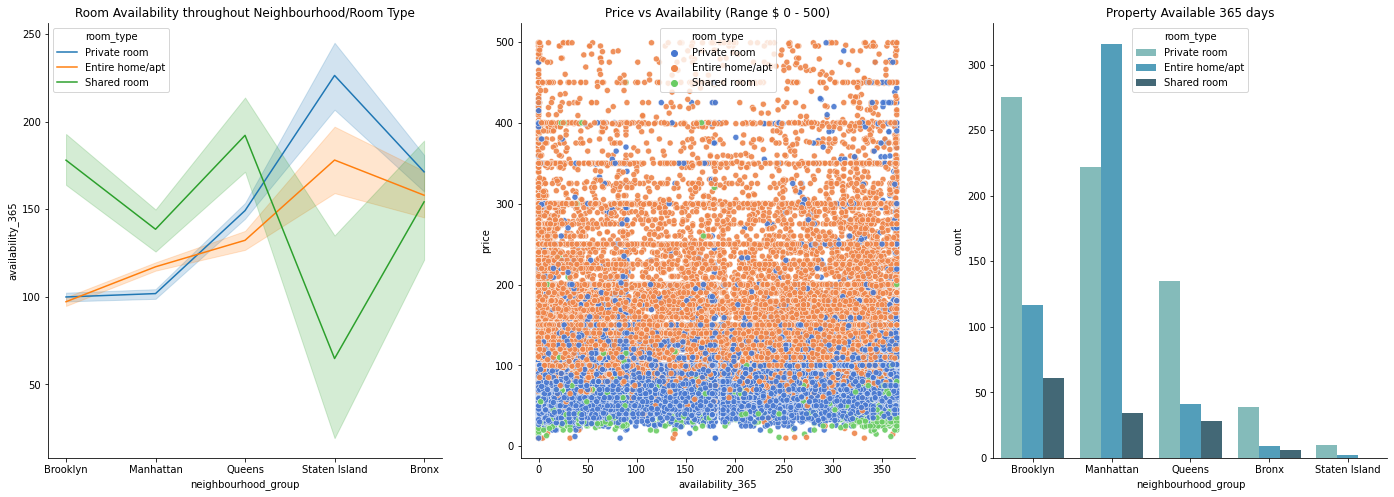

In [78]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 8))
ax = axes.flatten()

sns.lineplot(data=df, x='neighbourhood_group', y='availability_365', hue='room_type', ax=ax[0])
ax[0].set_title('Room Availability throughout Neighbourhood/Room Type')
sns.scatterplot(data=df[df['price'] < 500], x="availability_365", y='price', hue='room_type', alpha=.9, palette="muted", ax=ax[1])
ax[1].set_title('Price vs Availability (Range $ 0 - 500)')

sns.countplot(data=df[df['availability_365']  == 365], x='neighbourhood_group', hue='room_type', palette='GnBu_d', ax=ax[2])
ax[2].set_title('Property Available 365 days')
sns.despine(fig)

**Observations:**

*  From the above two graphs, Staten Island has most busiest Shared Room as well as Most available Private Room. Brroklyn and Manhattan has quite similar availabilities. On the other hand, from Price vs Availability graph, we can notice almost uniform distribution i.e. A particular room type of a particular price range can be available throughout year. 

*  Also there are 1295 total properties that are available 365 days a year. Manhattan tops this list with 572 properties while Brooklyn stands at second with 453 properties available.

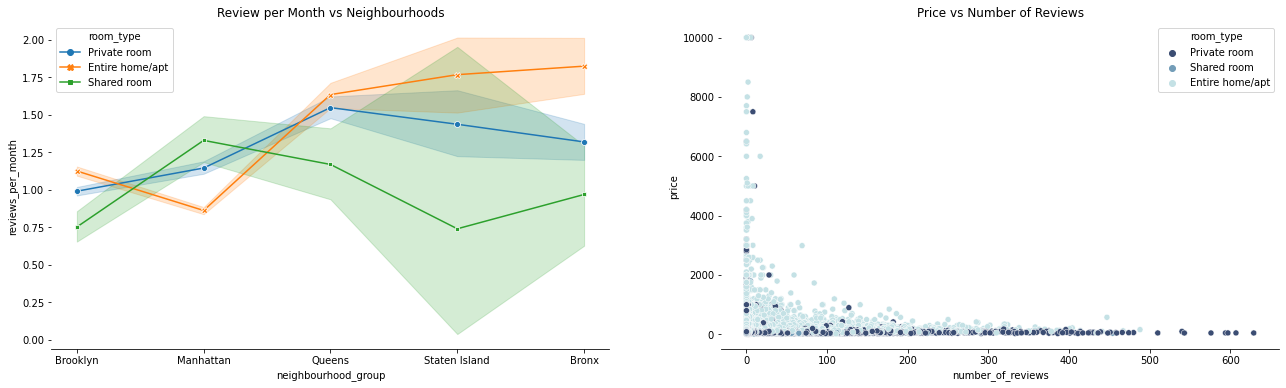

In [79]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(22, 6))
ax = axes.flatten()

sns.lineplot(data=df, x='neighbourhood_group', y='reviews_per_month', hue='room_type', style="room_type",
        markers=True, dashes=False, ax=ax[0])
ax[0].set_title('Review per Month vs Neighbourhoods')
sns.scatterplot(data=df, x='number_of_reviews', y='price', hue='room_type', palette="ch:r=-.2,d=.3_r",
        hue_order=['Private room', 'Shared room', 'Entire home/apt'], ax=ax[1])
ax[1].set_title('Price vs Number of Reviews')
sns.despine(fig, left=True)

**Observations:**

Brooklyn and Manhattan stands pretty fall in terms of review rate per month. Also, we can notice a negative relation between price & no. of reviews. Where, costlier properties has significantly less no of reviews, but cheaper properties have large number of reviews. Usually, cheaper rooms has more number of guest visits than costlier one, we know no of reviews is directly proportional to no of guests.

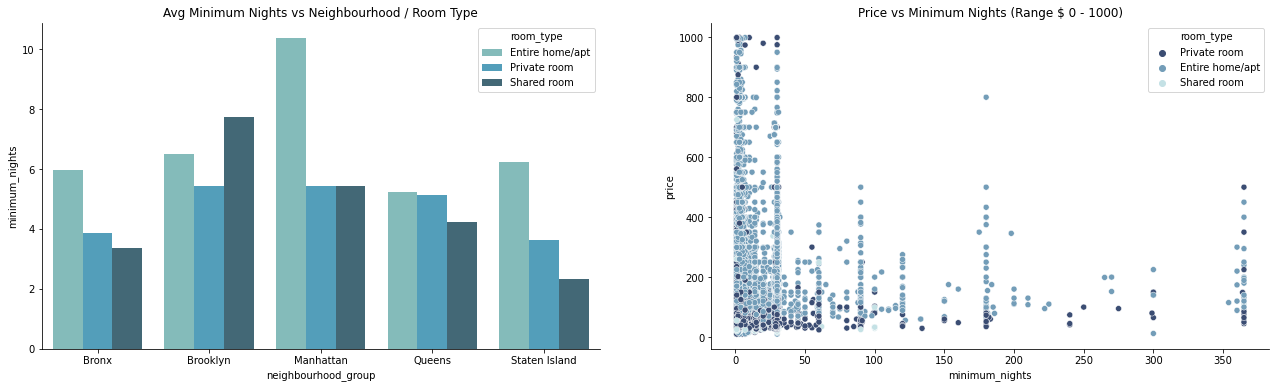

In [80]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(22, 6))
ax = axes.flatten()

mean_price_df = df.groupby(['neighbourhood_group', 'room_type'], as_index=False)[['minimum_nights']].mean()
sns.barplot(data=mean_price_df, x='neighbourhood_group', y='minimum_nights', hue='room_type', palette='GnBu_d', ax=ax[0])
ax[0].set_title("Avg Minimum Nights vs Neighbourhood / Room Type");

sns.scatterplot(data=df[df['price'] < 1000], x='minimum_nights', y='price', hue='room_type', palette="ch:r=-.2,d=.3_r", ax=ax[1])
ax[1].set_title("Price vs Minimum Nights (Range $ 0 - 1000)")

sns.despine(fig)

**Observations:**

We can see, the more cost the property has, the more it tends to allow lower number of minimum nights. Within the price range 0 - 200, the minimum nights distribution is ranged between approx 0 - 400 days. But within the price range $ 600 - 1000, avg minimum nights decreased to ~7 nights. But still, we can say most hosts gives less than 10 nights mandatory stay.

As a trivia, Manhattan has highest avg minimum night restriction.

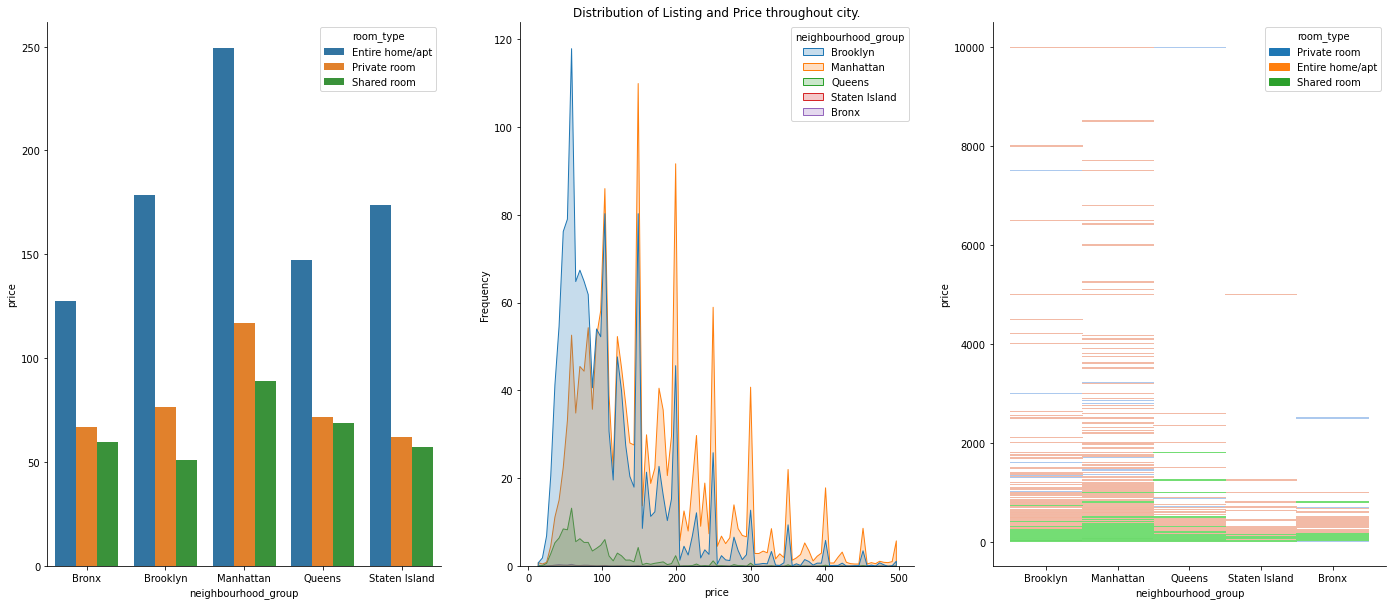

In [81]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 10))
ax = axes.flatten()

# group_price_df = df.groupby('neighbourhood_group')['price'].agg([np.max, np.mean, np.min]).reset_index()
mean_price_df = df.groupby(['neighbourhood_group', 'room_type'], as_index=False)[['price']].mean()
sns.barplot(data=mean_price_df, x='neighbourhood_group', y ='price', hue='room_type', ax=ax[0])

sns.histplot(data=df[df['price'] < 500], x="price", hue="neighbourhood_group", stat='frequency', element='poly', ax=ax[1])
sns.histplot(data=df, x='neighbourhood_group', y='price', hue='room_type', element='poly', ax=ax[2])
ax[1].set_title('Distribution of Listing and Price throughout city.')
sns.despine(fig)

**Observations:**

From the above graph, we can understand Brooklyn and Manhattan stands within the most urban and active area, in terms of listing areas and pricing. Manhattan & Brooklyn has highest avg room price, though Staten Island is not far behind. Shared room has relatively low price and also low in count in all the neighbourhood, whilst Manhattan has most number of **Entire home/apt** category, but Brooklyn has most number of **Private room** category.
\
Let's analyse these in terms of **room_category**

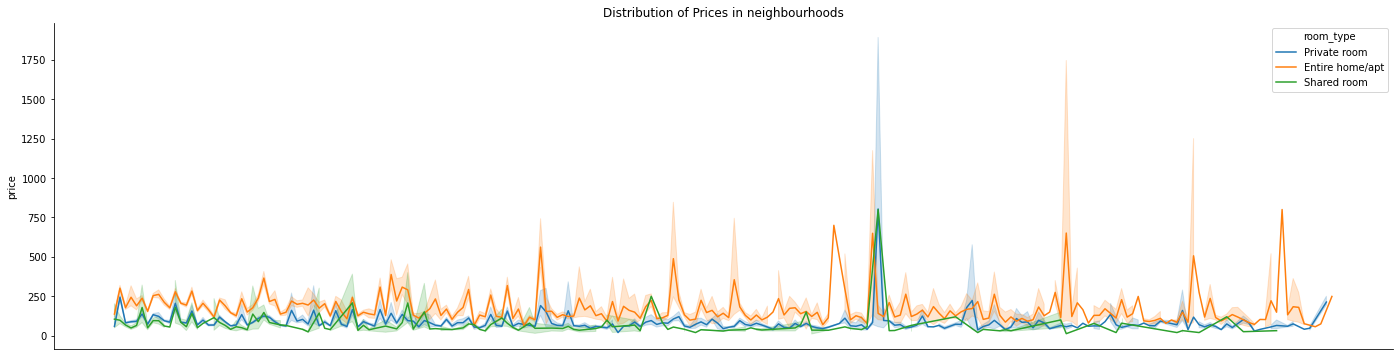

In [82]:
fig = plt.figure(figsize=(24, 6))
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
sns.lineplot(data=df, x='neighbourhood', y='price', hue='room_type')
plt.title('Distribution of Prices in neighbourhoods')
sns.despine(fig)

**Observation:**

Clearly, room type **Entire home/apt** has maintained higher price range in almost all neighbourhoods.

# **Conclusion**



So, this AirBNB dataset is a rich in data but not on features. From the entire above analysis we can conclude that,
* Most visitors don't prefer shared rooms, they tend to visit private room or entire home.
* Manhattan and Brooklyn are the two distinguished, expensive & posh areas of NY
* Though location of property has high relation on deciding its price, but a property in popular location doesn't mean it will stay occupied in most of the time.
* Performing a regression on this dataset may result in high error rate, as the features given in this dataset, are of very poor quality in deciding the property valuation. We can see this by looking at corelation heatmap. We would need more features like bedrooms, bathroom, property age (guessed it'd be a very important one), tax_rate applicable on land, room extra amenities, distance to nearest hospital, stores or schoolds. These features might have a high relation with price.
* We could use a time series analysis to make prediction of occupancy rate at particular time of a month, or particular time of a season.
* It'd be a better if we had avg guest ratings of a property, that would be beneficial in understanding the property more and could also be a factor in deciding price (a low rated property tends to lower their price)